# About the Project

#### Primary objective is to enhance and optimize sales strategies. The dataset utilized in this project is sourced from the Kaggle Walmart Sales Forecasting Competition.

# Purpose of the Project

#### The main goal of this project is to gain understanding from Walmart's sales data, exploringthe various factors that influence sales across different branches.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Walmart Sales Data.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
# The Dataset is of 'Zero' null values. It is clean.

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


# Feature Engineering

#### Adding a new column 'time_of_day' to give insight of sales in the morning, afternoon and evening. This will help answer the question which part of the day sales are made

In [7]:
from datetime import datetime

In [8]:
# Date and Time columns are in different column, we need to merge the columns into one. So that new column 'time_of_day' can be created without any errors.

df['Date_Time'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)

In [9]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date_Time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [10]:
df.drop(['Date_Time'], axis = 1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [11]:
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.time

In [12]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date_Time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [13]:
df['hour'] = df['Time'].apply(lambda x: str(x.hour).zfill(2))
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date_Time,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10


In [14]:
def time_of_day(hour):
    if 6 <= hour.hour <= 12:
        return 'Morning'
    elif 12 <= hour.hour <= 17:
        return 'Afternoon'
    elif 17 <= hour.hour <= 21:
        return 'Evening'
    else:
        return 'Night'

In [15]:
#df['time_of_day'] = df['hour'].apply(time_of_day)

# Business questions to answer:

## Product Analysis

### 1) How many unique cities does the data have?

In [16]:
# Count the number of unique cities
num_cities = df['City'].nunique()
print('Number of unique cities:', num_cities)

unique_cities = df['City'].unique()
unique_cities

Number of unique cities: 3


array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

### 2) How many unique product lines does the data have?

In [17]:
product = df['Product line'].unique()
product

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

### 3) In which city is each branch situated?

In [18]:
branch = df.groupby('Branch')['City'].unique()
branch

Branch
A       [Yangon]
B     [Mandalay]
C    [Naypyitaw]
Name: City, dtype: object

### 4) What is the most common payment method?

In [19]:
# Count the occurences of each payment method
pay_counts = df['Payment'].value_counts()

# get the most common payment method
most_common = pay_counts.idxmax()
print('The most common payment method is:', most_common)

The most common payment method is: Ewallet


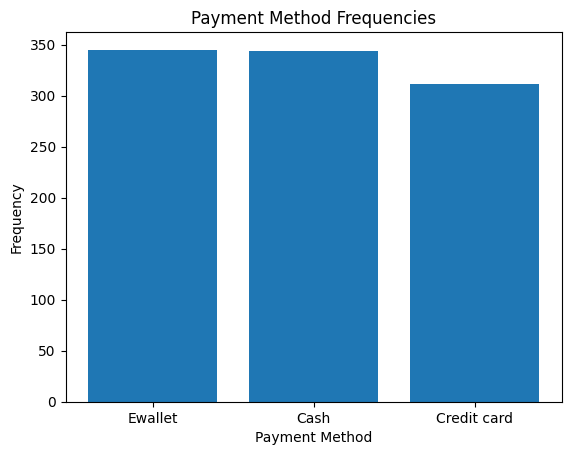

In [20]:
pay_counts = df['Payment'].value_counts()
plt.bar(pay_counts.index, pay_counts.values)
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Payment Method Frequencies')
plt.show()

### 5) What is the most selling product line?

In [21]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Date_Time', 'hour'],
      dtype='object')

In [22]:
product_line_sales = df.groupby('Product line')['Quantity'].sum()
print(product_line_sales)

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64


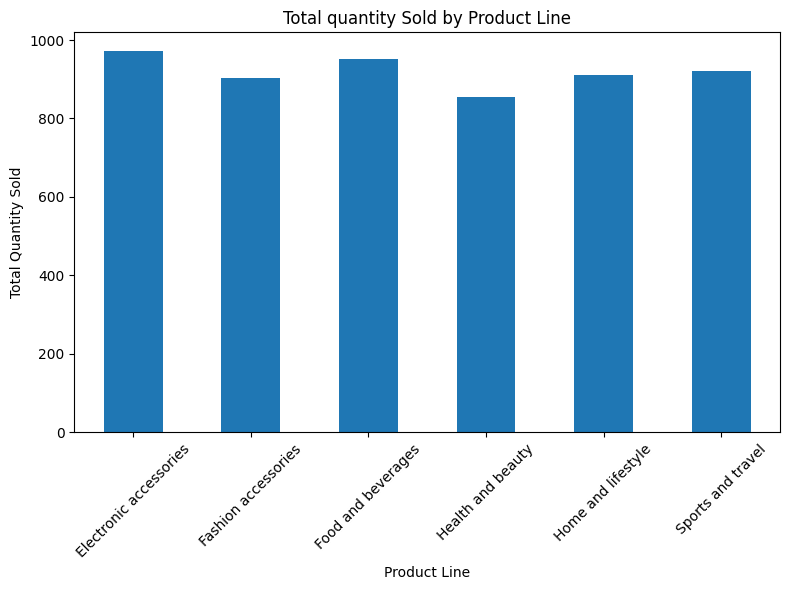

In [23]:
fig = plt.figure(figsize=(8,6))
product_line_sales.plot(kind='bar')
plt.title('Total quantity Sold by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 45)
fig.tight_layout()
fig.savefig('a.png')
plt.show()

### 6) What is the total revenue by month?

In [24]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df['Month'] = df['Date'].dt.month
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date_Time,hour,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10,2


In [26]:
# calculate the total revenue by month
revenue_by_month = df.groupby('Month')['Total'].sum()
print(revenue_by_month)

Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64


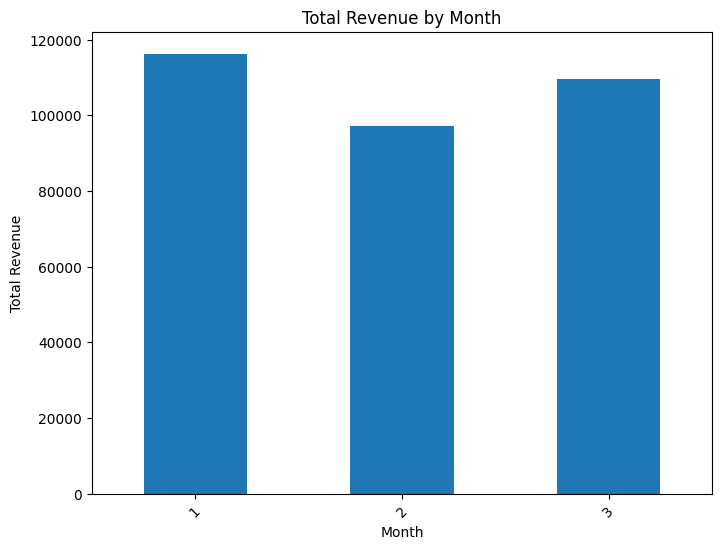

In [27]:
plt.figure(figsize=(8, 6))
revenue_by_month.plot(kind='bar')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### 7) Which month had the largest Cost of Goods Sold (COGS)?

In [28]:
large_cogs = df.groupby('Month')['cogs'].sum()
print(large_cogs)

Month
1    110754.16
2     92589.88
3    104243.34
Name: cogs, dtype: float64


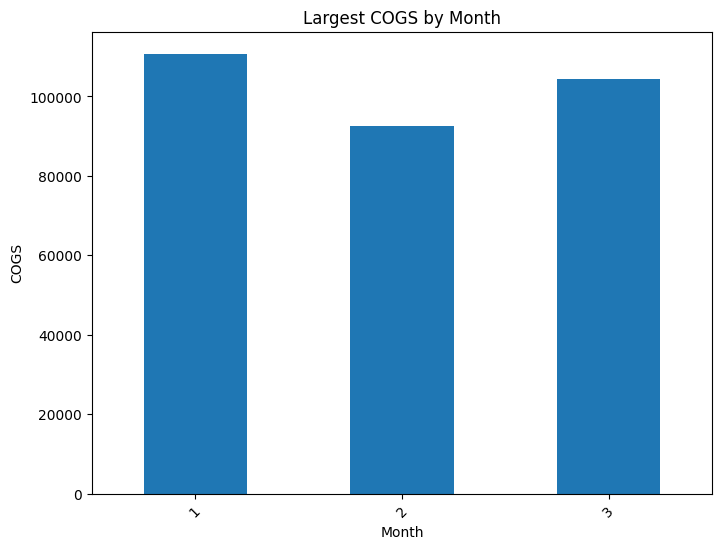

In [29]:
# plotting month with highest largest COGS
plt.figure(figsize=(8, 6))
large_cogs.plot(kind='bar')
plt.title('Largest COGS by Month')
plt.xlabel('Month')
plt.ylabel('COGS')
plt.xticks(rotation=45)
plt.show()

### 8) What product line had the largest revenue?

In [30]:
# calculate the revenue for each product line
df['Revenue'] = df['Quantity'] * df['Unit price']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date_Time,hour,Month,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,3,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,3,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20,1,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10,2,604.17


In [31]:
# Group the data by product line and calculate the sum of revenue
product_revenue = df.groupby('Product line')['Revenue'].sum()
product_revenue

large_revenue_product_line = product_revenue.idxmax()
print('The product line with the largest revenue is:', large_revenue_product_line)

The product line with the largest revenue is: Food and beverages


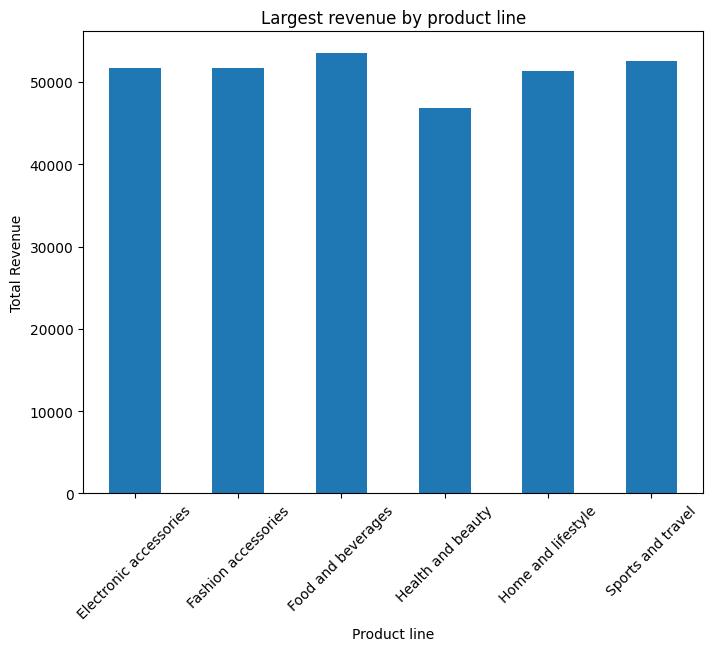

In [32]:
plt.figure(figsize=(8, 6))
product_revenue.plot(kind='bar')
plt.title('Largest revenue by product line')
plt.xlabel('Product line')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### 9) Which city has the largest revenue?

In [33]:
high_city = df.groupby('City')['Revenue'].sum()

high_city_index = high_city.idxmax()

print('The City with the largest revenue is:', high_city_index)

The City with the largest revenue is: Naypyitaw


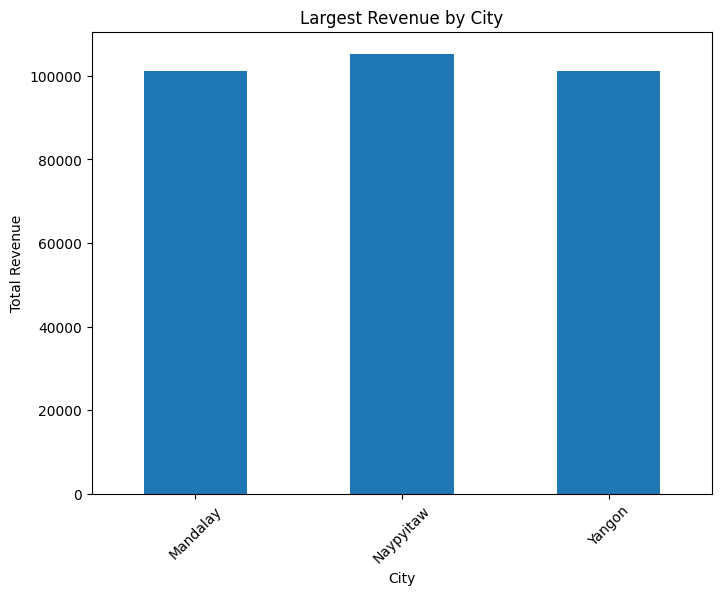

In [34]:
plt.figure(figsize=(8,6))
high_city.plot(kind='bar')
plt.title('Largest Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### 10) What product line has the largest VAT?

In [35]:
product_line_vat = df.groupby('Product line')['Tax 5%'].sum()
product_line_vat

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: Tax 5%, dtype: float64

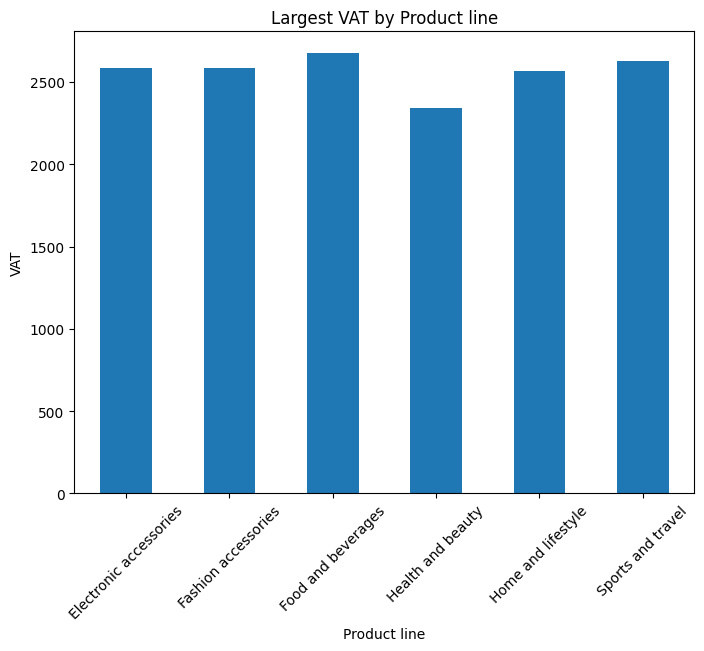

In [36]:
plt.figure(figsize=(8, 6))
product_line_vat.plot(kind='bar')
plt.title('Largest VAT by Product line')
plt.xlabel('Product line')
plt.ylabel('VAT')
plt.xticks(rotation=45)
plt.show()

### 11) Which branch sold more products than the average product?

In [37]:
# fetch each product line and add a column to those product line showing 'Good', 'Bad'. 
# Good if its greater than avg. sales, Calculate the avg. sales.
avg_sales = df['Total'].mean()

# add a new column 'Sales Status' to indicate whether sales are 'Good' or 'Bad'
df['Sales Status'] = df['Total'].apply(lambda x: 'Good' if x > avg_sales else 'Bad')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Date_Time,hour,Month,Revenue,Sales Status
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,1,522.83,Good
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,3,76.40,Bad
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,3,324.31,Good
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20,1,465.76,Good
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10,2,604.17,Good


In [38]:
avg = df['Total'].mean()
avg

322.966749

In [40]:
# Calculate the avg no. of products sold
avg_products_sold = df['Quantity'].mean()

# Filter the Dataframe to include branches with sales greater than the average
branch_avg = df[df['Quantity'] > avg_products_sold]['Branch'].unique()
print('Branches with sales above avg:')
for branch in branch_avg:
    print(branch)

Branches with sales above avg:
A
C
B


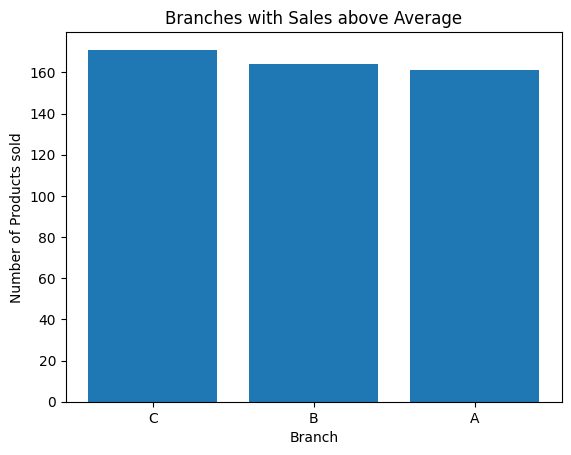

In [41]:
branch_avg = df[df['Quantity'] > avg_products_sold]['Branch'].value_counts()
plt.bar(branch_avg.index, branch_avg.values)
plt.xlabel('Branch')
plt.ylabel('Number of Products sold')
plt.title('Branches with Sales above Average')
plt.show()

### 12) What is the most common product line by Gender?

In [42]:
group_data = df.groupby(['Gender', 'Product line']).size().reset_index(name='Count')

# find the most common product line for each gender
most_common_product = group_data.groupby('Gender')['Count'].idxmax()
most_common_product_data = group_data.loc[most_common_product]

print(most_common_product_data[['Gender', 'Product line']])

   Gender         Product line
1  Female  Fashion accessories
9    Male    Health and beauty


In [43]:
# counts =df.groupby(['Gender', 'Product line'])['Total'].mean()
# counts

counts = df['Gender'].value_counts()
counts

Gender
Female    501
Male      499
Name: count, dtype: int64

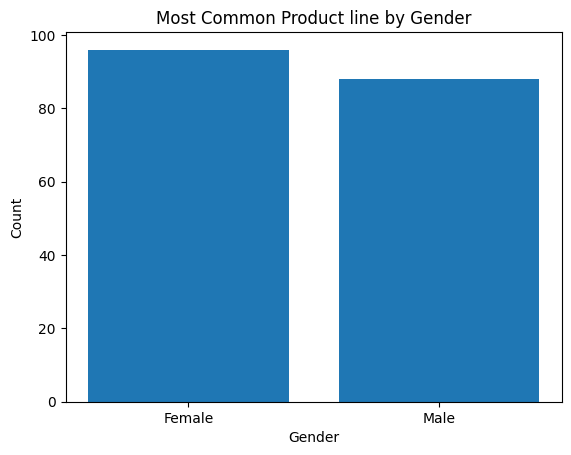

In [44]:
plt.bar(most_common_product_data['Gender'], most_common_product_data['Count'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Most Common Product line by Gender')
plt.show()

## Sales Analysis

### 1) Number of sales made in each time of the day per weekday

In [45]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
Date_Time                   994
hour                         11
Month                         3
Revenue                     991
Sales Status                  2
dtype: int64

In [46]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Date_Time,hour,Month,Revenue,Sales Status
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,13,1,522.83,Good
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,10,3,76.40,Bad
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,13,3,324.31,Good
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,20,1,465.76,Good
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,10,2,604.17,Good
